In [1]:
import numpy as np 
# Re-importing necessary libraries and loading the dataset
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset (assuming the file is correctly uploaded and named)
file_path = 'train_test_data.csv'
data = pd.read_csv(file_path)

data.head()

,Date,Id_compte,amount_transaction,category_transaction
0,2022-01-01 00:23:00,SEWC_CL.1,462.96,Food & Drink - Groceries
1,2022-01-01 00:26:00,SEW0C_LI.1,15.51,General Services - Home Repair + Maintenance
2,2022-01-01 01:01:00,US.1,2.24,Bank Transfers - ATM withdrawals
3,2022-01-01 01:21:00,TA.1,2.86,Transportation - Public Transport
4,2022-01-01 01:54:00,US.1,1.68,Bank Transfers - ATM withdrawals


In [2]:
data.dtypes

Date                     object
Id_compte                object
amount_transaction      float64
category_transaction     object
dtype: object

In [3]:
data.shape

(20411, 4)

In [4]:
data.isnull().sum()

Date                    0
Id_compte               0
amount_transaction      0
category_transaction    0
dtype: int64

In [11]:
data.describe()

,amount_transaction
count,20411.000000
mean,56.955119
std,150.401661
min,0.230000
25%,2.790000
50%,4.700000
75%,8.790000
max,2005.200000


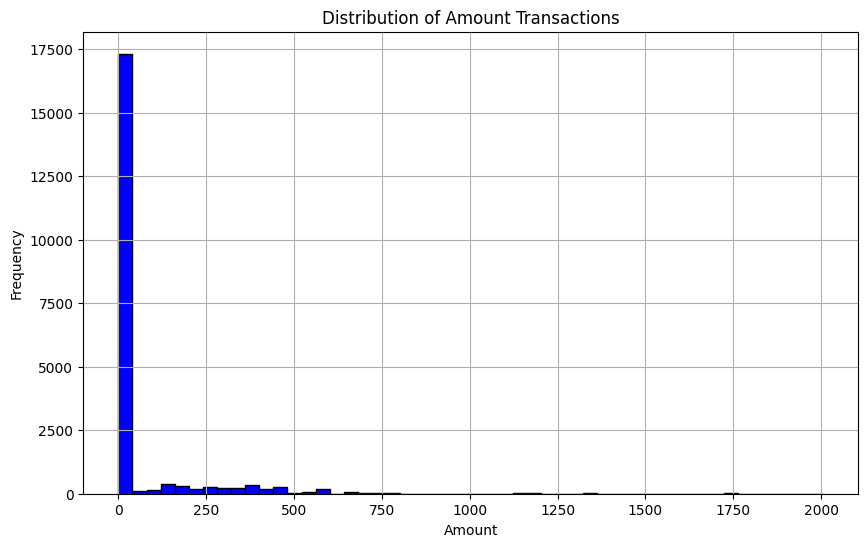

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame

# Convert 'amount_transaction' column to numeric (in case it's not already)
# df['amount_transaction'] = pd.to_numeric(df['amount_transaction'], errors='coerce')

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['amount_transaction'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Amount Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d %H:%M:%S')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = data['Date'].dt.hour
# Encoding 'Id_compte' as it is a categorical feature
le = LabelEncoder()
data['Id_compte_encoded'] = le.fit_transform(data['Id_compte'])
label_encoder = LabelEncoder()
data['category_encoded'] = label_encoder.fit_transform(data['category_transaction'])


In [14]:
data.head()

,Date,Id_compte,amount_transaction,category_transaction,Year,Month,Day,Hour,Id_compte_encoded,category_encoded
0,2022-01-01 00:23:00,SEWC_CL.1,462.96,Food & Drink - Groceries,2022,1,1,0,6,17
1,2022-01-01 00:26:00,SEW0C_LI.1,15.51,General Services - Home Repair + Maintenance,2022,1,1,0,5,37
2,2022-01-01 01:01:00,US.1,2.24,Bank Transfers - ATM withdrawals,2022,1,1,1,11,1
3,2022-01-01 01:21:00,TA.1,2.86,Transportation - Public Transport,2022,1,1,1,10,62
4,2022-01-01 01:54:00,US.1,1.68,Bank Transfers - ATM withdrawals,2022,1,1,1,11,1


(0.0, 70.35)

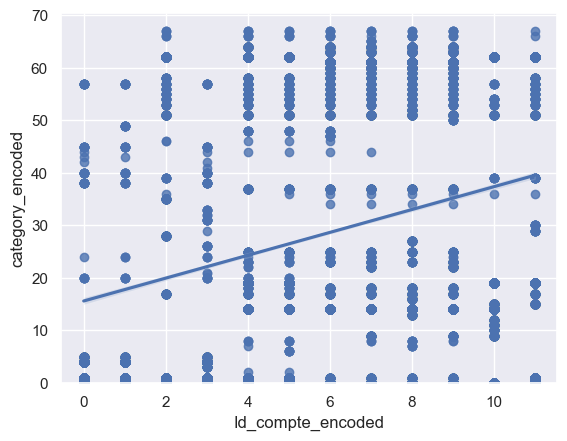

In [22]:
import seaborn as sns
sns.regplot(x = 'Id_compte_encoded', y = 'category_encoded', data = data)
plt.ylim(0, )


In [31]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [32]:
data = data.drop_duplicates()

C:\Users\PC-HP\AppData\Local\Temp\ipykernel_10532\797469288.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


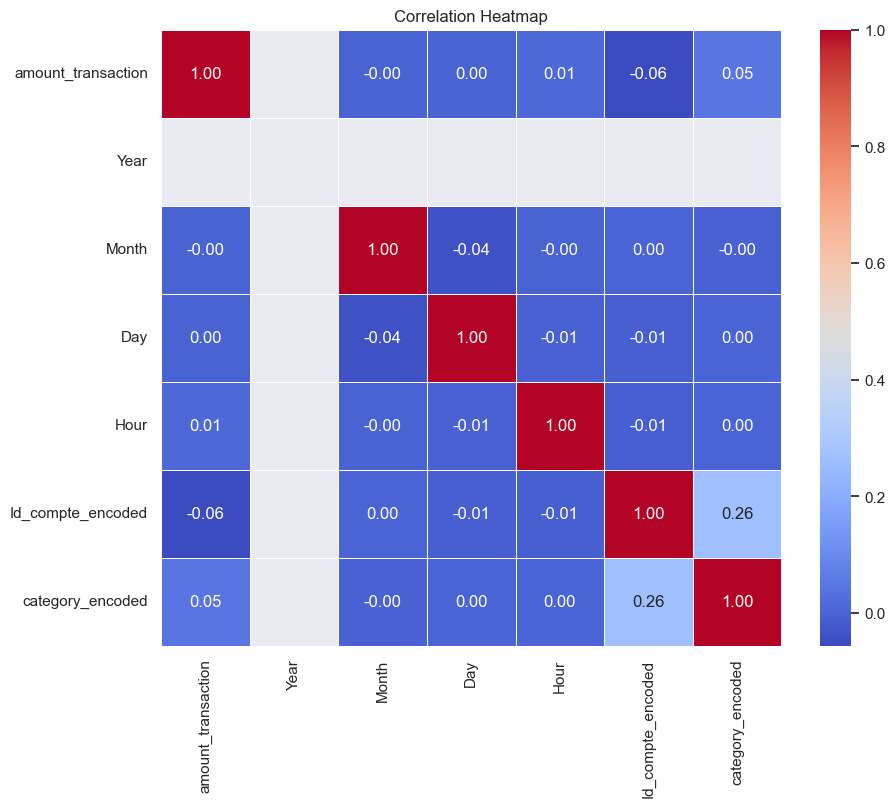

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
# If it's not, replace 'data' with the actual name of your DataFrame

# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'SEWC_CL.1'),
  Text(1, 0, 'SEW0C_LI.1'),
  Text(2, 0, 'US.1'),
  Text(3, 0, 'TA.1'),
  Text(4, 0, 'HP.1'),
  Text(5, 0, 'CPA_MP.1'),
  Text(6, 0, 'SEW0C_HI.1'),
  Text(7, 0, 'IPA.1'),
  Text(8, 0, 'CPA.1'),
  Text(9, 0, 'SEWC_P_PL.1'),
  Text(10, 0, 'SEWC_PA.1'),
  Text(11, 0, 'SEWC_P.1')])

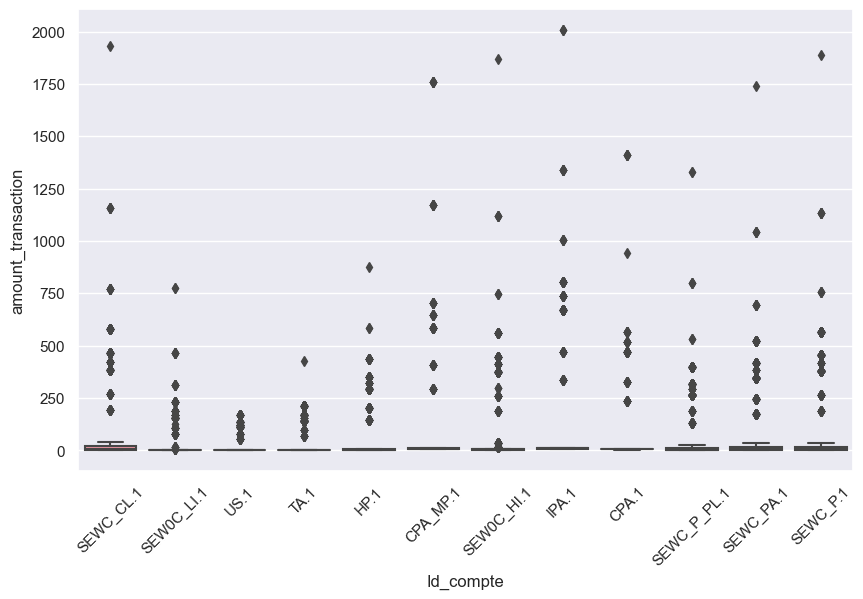

In [35]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Id_compte', y='amount_transaction', data=data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 [Text(0, 0, 'Food & Drink - Groceries'),
  Text(1, 0, 'General Services - Home Repair + Maintenance'),
  Text(2, 0, 'Bank Transfers - ATM withdrawals'),
  Text(3, 0, 'Transportation - Public Transport'),
  Text(4, 0, 'Bank Transfers - ATM fees'),
  Text(5, 0, 'Food & Drink - Coffee and tea'),
  Text(6, 0, 'Subscription - Others'),
  Text(7, 0, 'Transportation - Tolls'),
  Text(8, 0, 'Food & Drink - Fast food'),
  Text(9, 0, 'Food & Drink - Vending machines'),
  Text(10, 0, 'Transportation - Parking'),
  Text(11, 0, 'Medical - Pharmacies and supplements'),
  Text(12, 0, 'Rent & Utilities - Internet'),
  Text(13, 0, 'Bank Transfers - Other bank fees'),
  Text(14, 0, 'Food & Drink - Rest

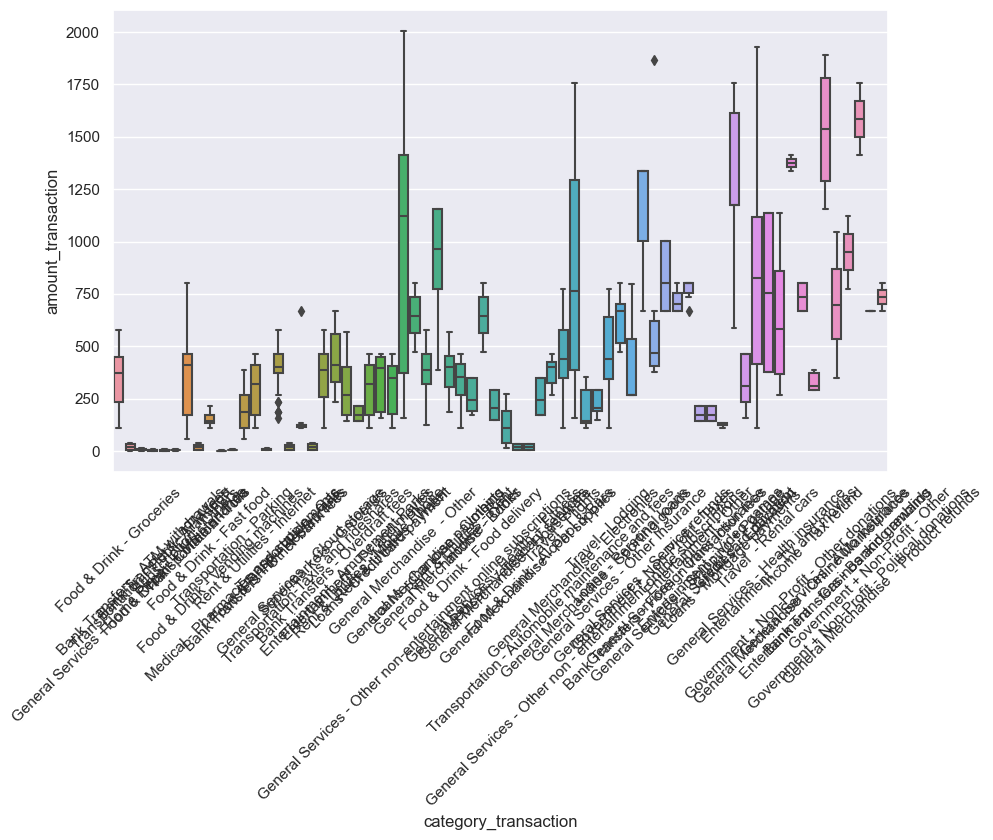

In [36]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='category_transaction', y='amount_transaction', data=data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11')])

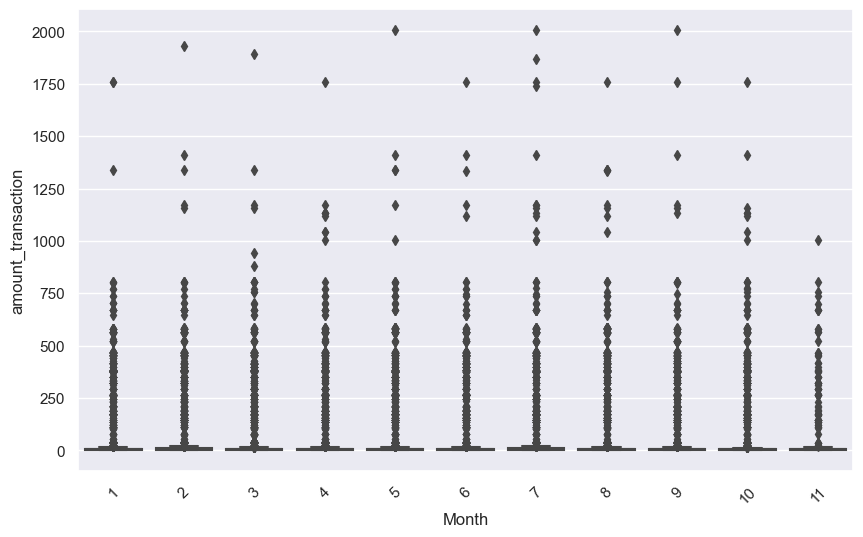

In [39]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Month', y='amount_transaction', data=data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [40]:
split_date = data['Date'].quantile(0.74)  # Using the 80th percentile date for splitting
train_data = data[data['Date'] <= split_date]
test_data = data[data['Date'] > split_date]
# Data Preprocessing

# Extracting year, month, and day as features


# Preparing the data for the model
X_train = train_data[[ 'Id_compte_encoded', 'category_encoded','Month','Day','Hour']]
y_train = train_data['amount_transaction']
# Preparing the data for the model
X_test = test_data[['Id_compte_encoded', 'category_encoded','Month','Day','Hour']]
y_test = test_data['amount_transaction']
train_data.head()

,Date,Id_compte,amount_transaction,category_transaction,Year,Month,Day,Hour,Id_compte_encoded,category_encoded
0,2022-01-01 00:23:00,SEWC_CL.1,462.96,Food & Drink - Groceries,2022,1,1,0,6,17
1,2022-01-01 00:26:00,SEW0C_LI.1,15.51,General Services - Home Repair + Maintenance,2022,1,1,0,5,37
2,2022-01-01 01:01:00,US.1,2.24,Bank Transfers - ATM withdrawals,2022,1,1,1,11,1
3,2022-01-01 01:21:00,TA.1,2.86,Transportation - Public Transport,2022,1,1,1,10,62
4,2022-01-01 01:54:00,US.1,1.68,Bank Transfers - ATM withdrawals,2022,1,1,1,11,1


In [41]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor)
model=GradientBoostingRegressor()
model=model.fit(X_train,y_train)
# Predicting on the training set using Gradient Boosting Regressor
gb_y_pred_train = model.predict(X_test)

# Calculating Mean Squared Error on the training set
gb_mse_train = mean_squared_error(y_test, gb_y_pred_train)
print("\nGradient Boosting Regressor MSE on Training Set:", gb_mse_train)


Gradient Boosting Regressor MSE on Training Set: 3478.512930439429


In [42]:
# Generating Predictions for the Evaluation Period
# Creating a dataframe for prediction dates
prediction_dates = pd.date_range(start='2022-11-08', end='2022-12-31')
prediction_data = pd.DataFrame({
    'Date': np.repeat(prediction_dates, len(le.classes_)),
    'Id_compte_encoded': np.tile(le.transform(le.classes_), len(prediction_dates))
})
print(prediction_data)

          Date  Id_compte_encoded
0   2022-11-08                  0
1   2022-11-08                  1
2   2022-11-08                  2
3   2022-11-08                  3
4   2022-11-08                  4
..         ...                ...
643 2022-12-31                  7
644 2022-12-31                  8
645 2022-12-31                  9
646 2022-12-31                 10
647 2022-12-31                 11

[648 rows x 2 columns]


In [43]:
%load_ext sql

In [44]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [45]:
%sql sqlite:///my_data1.db

In [46]:
# Assuming 'data' is your DataFrame
chunksize = 1000  # Adjust this value based on your dataset size

data.to_sql("SPACEXTBL", con, if_exists='replace', index=False, method="multi", chunksize=chunksize)


20409

In [47]:
%sql SELECT category_transaction, sum(amount_transaction) as total_amount FROM SPACEXTBL where Id_compte_encoded=0 and Month=11 group by category_transaction  ORDER BY total_amount DESC;


 * sqlite:///my_data1.db
Done.


category_transaction,total_amount
General Services - Other Insurance,564.24
Bank Transfers - Other bank fees,70.5
Bank Transfers - ATM withdrawals,44.65
Bank Transfers - ATM fees,16.919999999999998


In [49]:
# Extracting month and day for prediction
prediction_data['Year'] = prediction_data['Date'].dt.year
prediction_data['Month'] = prediction_data['Date'].dt.month
prediction_data['Day'] = prediction_data['Date'].dt.day
prediction_data['Hour'] = prediction_data['Date'].dt.hour
# Mapping conditions
category_mapping = {
    0: 4, 1: 5, 2: 55, 3: 5,
    4: 44, 5: 51, 6: 18, 7: 17,
    8: 66, 9: 22, 10: 15, 11: 15
}

# Adding the 'category_encoded' column based on the mapping
prediction_data['category_encoded'] = prediction_data['Id_compte_encoded'].map(category_mapping)

# Making predictions
X_prediction = prediction_data[['Id_compte_encoded', 'category_encoded','Month','Day','Hour']]


predicted_amounts = model.predict(X_prediction)

# Adding the predicted amounts to the prediction data
prediction_data['Predicted_Amount'] = predicted_amounts

# Creating an ID column for output
prediction_data['ID'] = prediction_data['Date'].dt.strftime('%Y-%m-%d') + '_' + le.inverse_transform(prediction_data['Id_compte_encoded'])

# Preparing the final output
final_output = prediction_data[['ID', 'Predicted_Amount']]

# Save the final output data to a CSV file
# final_output.to_csv('final_output_predictions.csv', index=False)
final_output.head()

,ID,Predicted_Amount
0,2022-11-08_CPA.1,15.472973
1,2022-11-08_CPA_MP.1,388.652477
2,2022-11-08_HP.1,347.111969
3,2022-11-08_IPA.1,483.819069
4,2022-11-08_SEW0C_HI.1,438.677689


In [50]:
df= pd.DataFrame(final_output)
df= pd.DataFrame(final_output)
# Specify the file path where you want to save the CSV file
csv_file_path = 'predicted_amounts.csv'

# Save the DataFrame to a CSV file

df.to_csv(csv_file_path, index=False)